**The objective of this challenge is to forecast the number of turtles caught per week per capture site. This will help Local Ocean plan their staff schedules and budget.**

In [603]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 200, "display.max_rows", 200)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [536]:
turtle = pd.read_csv("train.csv", delimiter=",")
varDesc = pd.read_csv("variable_definitions.csv", engine="python")
submissionSample = pd.read_csv("Sample_sub.csv")
turtle.shape

initialRows = turtle.shape[0]

In [537]:
turtle.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,Tag_2,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,None,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,None,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,None,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,None,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,None,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


There are some identified inconsisenties: 
* For example, "Creek" and "creek" both mean the same thing. In this case, we will capitalize all entries within the said variable. <br>
* Converting the date variables to date time datatype. <br> 
* Drop the string row values in the Date_TimeRelease column. <br>

In [538]:
turtle["ForagingGround"] = turtle["ForagingGround"].apply(lambda x: str(x).capitalize())
turtle["CaptureMethod"] = turtle["CaptureMethod"].apply(lambda x: str(x).capitalize())

In [539]:
# releaseRows = ["ReleaseSite_50", "Released", "ReleaseSite_62", "ReleaseSite_56", "ReleaseSite_8", 
#                " green algae on the right inframarginal", " notch on fifth CS", "ReleaseSite_26", 
#                "ReleaseSite_21", " sm Bs all flips + shoulders", " barnacles (tiny) around neck", 
#                " notches on rear MS", "ReleaseSite_68", "ReleaseSite_19", "ReleaseSite_18", "ReleaseSite_11", 
#                "ReleaseSite_73", " notch on eleventh PMS", " tag hole on LRF", " tip of fifth CS missing", 
#                "ReleaseSite_9", " covered with thick green algae. Euthanised 27/9", 
#                " few small barnacles on head& FF + plastron& net damage on RFF", " flaking plastron", 
#                "ReleaseSite_39", " calcerous algal patches to rear", " sm bs on flips", 
#                " fresh wounds on RFs", " indent 7RMS", " a v-shaped notch in the middle of RFF", 
#                "ReleaseSite_35", " inside LFFsmall notch wound", "ReleaseSite_17", 
#                " LFflip inside last 3rd small fresh wound", " small piece on LRF missing", 
#                " calcareous algae on the plastron", " small healing tissue on neck", 
#                " outer edge of both RF are frayed", " few small barnacles on flippers", 
#                ' 1 b at junction of 1 CS+ 2 CS + 1 LLS', ' scar 3LLS', ' the edge of the LFF is jagged', 
#                ' swelling caused by the tagging', ' at least 50% of the right rear flipper is missing', 
#                ' 5 postoculars on the left side', ' 3 post-oculars on either side', 
#                ' 5 post-oculars on the right side',  ' 1 B on 2 CS& 11 RMS& R supra and LFF', 
#                "ReleaseSite_70", 'ReleaseSite_52', ' some flaking at scute joins', ' end supras broken off', 
#                ' 2 sm wounds on neck (scraping)', " calcareous algae on eigth CS", 
#                " flaking on edges of scutes", " small Bs on front flippers", " ", 
#                " flaking on the joints& light greenish algae on CS", "ReleaseSite_7", " light algae covering", 
#                " chips (inside edeg) and net damage on front flippers", " net damage on tip of LFF", 
#                " green and white calcareous algae on the plastron", " small dent on the nuchal scute", 
#                "ReleaseSite_4", "ReleaseSite_23", " some tiny barnacles on plastron", "ReleaseSite_60", 
#                " much red/green algae & bs on underside", "ReleaseSite_0", " RSCS missing tip", 
#                " small B on R supra", " light green algae on shell", " healing wound tissue at join 4CS/4RLS", 
#                " tag rip in LFF", " small barnacles on the carapace", 
#                " small barnacles on plastron and around the tail", " clean plastron", " flaking on plastron", 
#                " soft carapace", "ReleaseSite_32", 
#                "  notch in left supracandal + between supras.+ lost its tag from left rear flipper some time ago+ no fresh wound+ a little light algae covering", 
#                "ReleaseSite_29", " = all small bs", " light green algae on carapace", " supras half broken", 
#                " lge notch 10LMS& 8&10 and 11RMS", " tag rips on both RFs", " green algae on the plastrons", 
#                " barnacles on plastron and flippers (removed)", " 6CS", " L supracaudal is half broken", 
#                " scutepeeling on 10th and 11th RMS", " many sm bs on rear of shell& chip RRF", 
#                " b scar 1LLs & 5CS& sm chip RRF", " notch on join 10/11LMS", 
#                " right front flipper has b's at end", " flaking from 2nd>5th CS and 10th RMS", 
#                " a small scute between fourth and fifth LLS", "  a chip  9th LM", 
#                ' edgers of both RFs are jagged', ' few white patches of cancerous algae on rear scutes', 
#                "ReleaseSite_55", " 2/3 of LRF is missing", ' green algae on the plastron', 
#                ' thin green algae on both sides of the inframarginals', " green algae on rear carapace", 
#                " tag rip on LRF"
# ]
# turtle = turtle[~(turtle["Date_TimeRelease"].isin(releaseRows))]

# print("{} rows dropped. {} values are none date in date time release".format(initialRows - turtle.shape[0], 
#                                                                              len(releaseRows)))

In [540]:
# convert to datetime datatype
turtle["Date_TimeCaught"] = pd.to_datetime(turtle["Date_TimeCaught"])
# turtle["Date_TimeRelease"] = pd.to_datetime(turtle["Date_TimeRelease"])
turtle[["Date_TimeCaught", "Date_TimeRelease"]].dtypes

Date_TimeCaught     datetime64[ns]
Date_TimeRelease            object
dtype: object

In [541]:
turtle = turtle[~(turtle["Status"] == "Admitted")]

In [542]:
turtle["Date_TimeCaughtYear"] = turtle["Date_TimeCaught"].apply(lambda x: x.strftime("%Y"))
turtle["Date_TimeCaughtWeek"] = turtle["Date_TimeCaught"].apply(lambda x: x.strftime("%W"))

# turtle["Date_TimeReleaseYear"] = turtle["Date_TimeRelease"].apply(lambda x: x.strftime("%Y"))
# turtle["Date_TimeReleaseWeek"] = turtle["Date_TimeRelease"].apply(lambda x: x.strftime("%W"))

turtle[["Date_TimeCaughtYear", "Date_TimeCaughtWeek"]].head()

,Date_TimeCaughtYear,Date_TimeCaughtWeek
0,2000,51
1,2001,43
2,2001,44
3,2002,10
4,2002,31


In [543]:
turtle[turtle["Date_TimeRelease"].isna()].head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,Tag_2,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,Date_TimeCaughtYear,Date_TimeCaughtWeek
9,2003_RE_0187,2003-06-09,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1066,LandingSite_CaptureSiteCategory_2,Species_5,KE1184,None,NaN,NaN,48.3,43.3,NaN,Unknown,10 LMS has a small chip& right rear flipper is...,Released,ReleaseSite_62,NaN,2003,23
11,2003_RE_0363,2003-09-02,Researcher_32,CaptureSite_0,Ocean,Longline,Fisher_2065,LandingSite_CaptureSiteCategory_2,Species_5,KE1323,None,NaN,NaN,43.4,41.7,NaN,Unknown,small scratches and saome flakings on the shel...,Released,ReleaseSite_62,NaN,2003,35
12,2003_RE_0411,2003-09-22,Researcher_30,CaptureSite_0,Ocean,Net,Fisher_2013,LandingSite_CaptureSiteCategory_2,Species_5,KE1359,None,NaN,NaN,58.2,53.3,NaN,Unknown,white calcerous algae on 5CS anmd supras& inde...,Released,ReleaseSite_50,NaN,2003,38
16,2004_RE_0300,2004-10-16,Researcher_10,CaptureSite_0,Ocean,Net,Fisher_838,LandingSite_CaptureSiteCategory_2,Species_5,KE1609,None,NaN,NaN,37.0,36.1,NaN,Unknown,Tip of LFF missing.,Released,ReleaseSite_62,NaN,2004,41
17,2008_RE_0022,2008-01-23,Researcher_30,CaptureSite_0,Ocean,Net,Fisher_257,LandingSite_CaptureSiteCategory_2,Species_5,3396,None,NaN,NaN,38.1,38.2,NaN,NaN,6 CS& 5 RLS. Brown algae on flippers& neck and...,NaN,ReleaseSite_62,NaN,2008,03


In [544]:
turtle[turtle["ReleaseSite"].isna()]

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,Tag_2,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,Date_TimeCaughtYear,Date_TimeCaughtWeek
116,2008_RE_0425,2008-09-11,Researcher_4,CaptureSite_1,Ocean,Net,Fisher_1550,LandingSite_CaptureSiteCategory_2,Species_5,3629,None,NaN,NaN,NaN,NaN,NaN,NaN,Fibropapillomous tumours on shoulders& soft ne...,green algae on scutes,NaN,ReleaseSite_62,2008,36
117,2008_RE_0426,2008-09-11,Researcher_30,CaptureSite_1,Ocean,Net,Fisher_1550,LandingSite_CaptureSiteCategory_2,Species_5,3628,None,NaN,NaN,64.0,61.2,NaN,NaN,Net bruises on shoulders,no other major physical characteristics,NaN,ReleaseSite_56,2008,36
118,2008_RE_0427,2008-09-11,Researcher_30,CaptureSite_1,Ocean,Net,Fisher_1550,LandingSite_CaptureSiteCategory_2,Species_5,3627,None,NaN,NaN,48.3,45.3,NaN,NaN,Brown algae on neck& flippers and shoulders,light green algae on scutes,NaN,ReleaseSite_56,2008,36
119,2008_RE_0428,2008-09-12,Researcher_30,CaptureSite_1,Ocean,Net,Fisher_373,LandingSite_CaptureSiteCategory_2,Species_5,3630,None,NaN,NaN,44.2,42.1,NaN,NaN,Green algae on scutes,no other major characteristics,NaN,ReleaseSite_8,2008,36
120,2008_RE_0429,2008-09-13,Researcher_30,CaptureSite_1,Ocean,Net,Fisher_1550,LandingSite_CaptureSiteCategory_2,Species_5,3634,None,NaN,NaN,61.0,58.7,NaN,NaN,A small additional scute between 4th and 5th C...,no other major characteristics,NaN,ReleaseSite_62,2008,36
121,2008_RE_0441,2008-09-19,Researcher_30,CaptureSite_1,Ocean,Net,Fisher_1550,LandingSite_CaptureSiteCategory_2,Species_5,KEB8105,3642,3641,NaN,101.0,91.4,NaN,NaN,Notch in the 10th RMS,no other major characteristics,NaN,ReleaseSite_50,2008,37
123,2008_RE_0452,2008-09-24,Researcher_4,CaptureSite_1,Ocean,Net,Fisher_1550,LandingSite_CaptureSiteCategory_2,Species_5,3652,None,NaN,NaN,60.4,56.0,NaN,NaN,Brown algae on neck and shoulder,B scar on 1st CS,NaN,ReleaseSite_62,2008,38
124,2008_RE_0453,2008-09-24,Researcher_4,CaptureSite_1,Ocean,Net,Fisher_1550,LandingSite_CaptureSiteCategory_2,Species_5,3651,None,NaN,NaN,43.1,42.0,NaN,NaN,Shell is in the flaking process,notch on LRF,NaN,ReleaseSite_62,2008,38
1001,2008_RE_0398,2008-09-02,Researcher_30,CaptureSite_10,Ocean,Net,Fisher_962,LandingSite_CaptureSiteCategory_2,Species_5,3613,None,NaN,NaN,46.6,43.4,NaN,NaN,Few patches of calcerous algae on scutes,V-shaped notch in RRF,NaN,ReleaseSite_62,2008,35
1481,2008_RE_0410,2008-09-07,Researcher_30,CaptureSite_11,Creek,Net,Fisher_92,LandingSite_CaptureSiteCategory_0,Species_5,3618,None,NaN,NaN,35.5,35.3,NaN,NaN,Shell is beginning to flake,notch in the middle of the inner edge of LFF,NaN,ReleaseSite_62,2008,35


It appears that most of the turtles are released on the same day they are captured. With this information, we will fill in the null released date for turtles with the released status similar to the date they were caught.

In [545]:
turtle[turtle["Date_TimeRelease"].isna()]

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,Tag_2,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,Date_TimeCaughtYear,Date_TimeCaughtWeek
9,2003_RE_0187,2003-06-09,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1066,LandingSite_CaptureSiteCategory_2,Species_5,KE1184,None,NaN,NaN,48.3,43.3,NaN,Unknown,10 LMS has a small chip& right rear flipper is...,Released,ReleaseSite_62,NaN,2003,23
11,2003_RE_0363,2003-09-02,Researcher_32,CaptureSite_0,Ocean,Longline,Fisher_2065,LandingSite_CaptureSiteCategory_2,Species_5,KE1323,None,NaN,NaN,43.4,41.7,NaN,Unknown,small scratches and saome flakings on the shel...,Released,ReleaseSite_62,NaN,2003,35
12,2003_RE_0411,2003-09-22,Researcher_30,CaptureSite_0,Ocean,Net,Fisher_2013,LandingSite_CaptureSiteCategory_2,Species_5,KE1359,None,NaN,NaN,58.2,53.3,NaN,Unknown,white calcerous algae on 5CS anmd supras& inde...,Released,ReleaseSite_50,NaN,2003,38
16,2004_RE_0300,2004-10-16,Researcher_10,CaptureSite_0,Ocean,Net,Fisher_838,LandingSite_CaptureSiteCategory_2,Species_5,KE1609,None,NaN,NaN,37.0,36.1,NaN,Unknown,Tip of LFF missing.,Released,ReleaseSite_62,NaN,2004,41
17,2008_RE_0022,2008-01-23,Researcher_30,CaptureSite_0,Ocean,Net,Fisher_257,LandingSite_CaptureSiteCategory_2,Species_5,3396,None,NaN,NaN,38.1,38.2,NaN,NaN,6 CS& 5 RLS. Brown algae on flippers& neck and...,NaN,ReleaseSite_62,NaN,2008,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16291,2011_RE_0805,2011-09-23,Researcher_20,CaptureSite_9,Ocean,Net,Fisher_1500,LandingSite_CaptureSiteCategory_1,Species_6,KE6278,None,NaN,NaN,33.2,30.9,4.5,NaN,thick green algae towards rear of carapace& pa...,NaN,ReleaseSite_11,NaN,2011,38
16292,2011_RE_0806,2011-09-23,Researcher_20,CaptureSite_9,Ocean,Net,Fisher_1550,LandingSite_CaptureSiteCategory_1,Species_5,KE6376,None,NaN,NaN,43.3,42.1,10.5,NaN,"thin green algae on plastron, 1 large bn on ca...",NaN,ReleaseSite_11,NaN,2011,38
16293,2011_RE_0807,2011-09-23,Researcher_20,CaptureSite_9,Ocean,Net,Fisher_1550,LandingSite_CaptureSiteCategory_1,Species_5,KEB7585,KEB7586,NaN,NaN,103.4,100.0,NaN,NaN,clean plastron and carapace,NaN,ReleaseSite_56,NaN,2011,38
16294,2011_RE_0809,2011-09-23,Researcher_20,CaptureSite_9,Ocean,Net,Fisher_1550,LandingSite_CaptureSiteCategory_1,Species_5,KE6377,None,NaN,NaN,41.1,38.6,8.5,NaN,few barnacleson carapace& additional small scu...,NaN,ReleaseSite_11,NaN,2011,38


In [546]:
turtle["Date_TimeRelease"] = np.where((turtle["Date_TimeRelease"].isnull()) & (turtle["Status"] == "Released"), turtle["Date_TimeCaught"], turtle["Date_TimeRelease"])

In [547]:
turtle["Status"] = np.where((turtle["Date_TimeRelease"].notnull()) & (turtle["Status"] != "Released"), "Released", turtle["Status"])

In [548]:
turtle[turtle["Status"] == "Admitted"]["Date_TimeRelease"].unique()

array([], dtype=object)

All turtles that were admitted, do not have a release date. The assumption in this case would be that all admitted turtles are not released.
<br><br>
The Status column is very messy. For that reason, it shall be dropped.

In [549]:
turtle[turtle["Date_TimeRelease"].isna()]["Status"].unique()

array([nan,
       ' 6 LLS& small notch in the joints between both 10th and 11th MS',
       'Not_Recorded',
       ' B on 2nd RLS& small bs on neck & RFs& scratch on 1st CS& 1b on 10th LMS+ L supracaudal +11th RM',
       ' small v-shaped notch on LRF', ' shell is beginning to flake',
       ' light pink calcerous', ' green algae towards rear carapace',
       ' 3rd CS is beginning to flake',
       ' the 2nd 3rd of both FFS from tips are jagged',
       ' a small projection on the middle of RRF', ' clean plastron',
       ' thick green algae on rear shell and rear flippers',
       ' few small barnacles on the plastron',
       ' slight chipping of all scutes& which were slightly elevated',
       ' tag rip in LRF', ' hook injury in the right shoulder',
       ' bleeding bruise at top of RFF', ' 1 b 5 CS & 1 small',
       ' sm bs 2RLS& both 11MS & 2LLS', ' sm bs on 1RLS and 3LLS',
       ' deep large cut(2Green Turtle)on soft flesh next to LFF (from hook)& 2bs LFFat middle& a chip o

## Exploratory Data Analysis

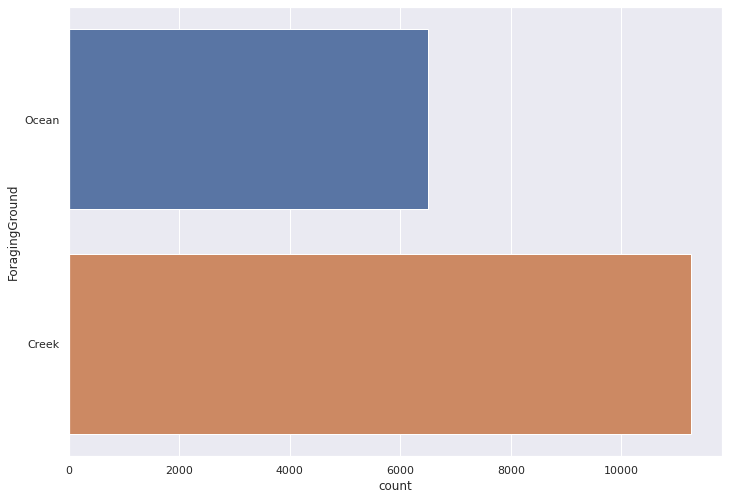

In [550]:
sns.countplot(y="ForagingGround", data=turtle)

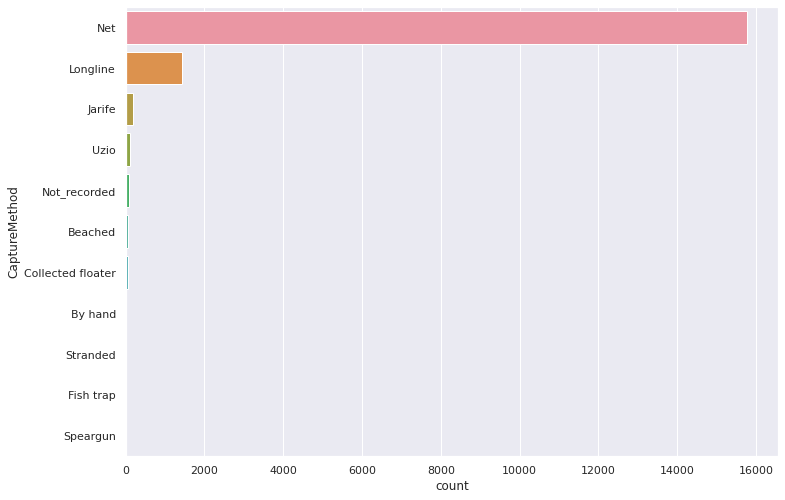

In [551]:
sns.countplot(y="CaptureMethod", data=turtle, order=turtle["CaptureMethod"].value_counts().index)

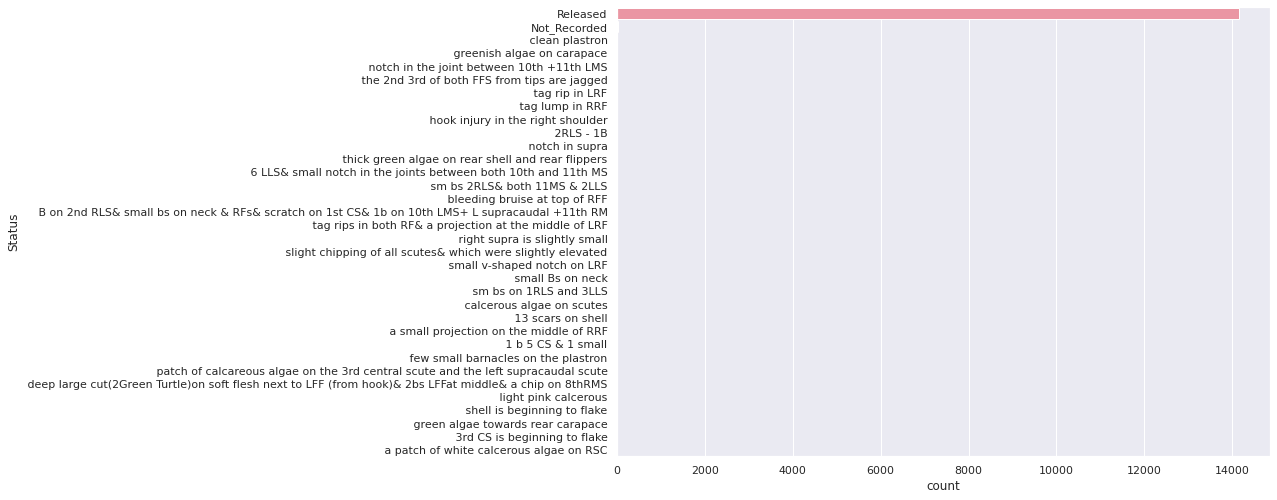

In [552]:
sns.countplot(y="Status", data=turtle, order=turtle["Status"].value_counts().index)

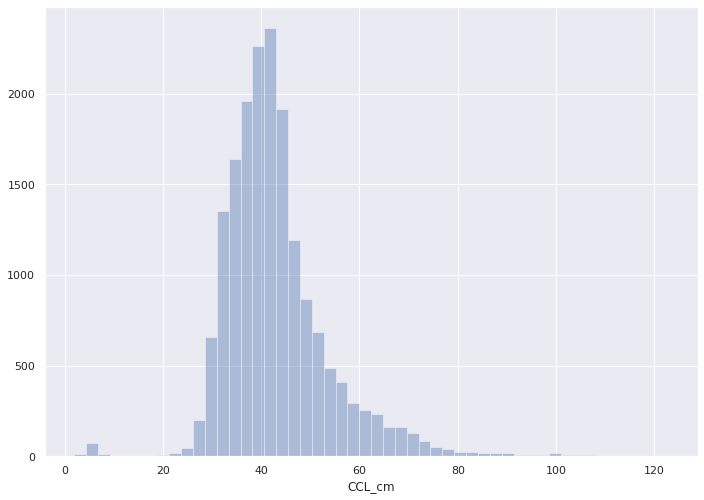

In [553]:
sns.distplot(turtle["CCL_cm"], kde=False)

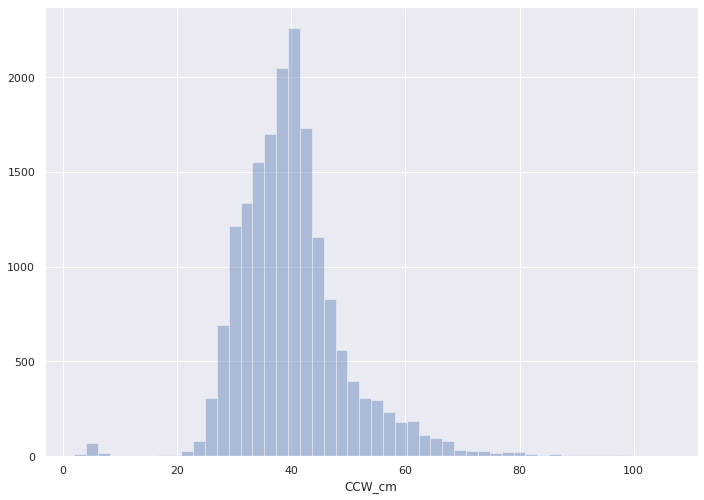

In [554]:
sns.distplot(turtle["CCW_cm"], kde=False)

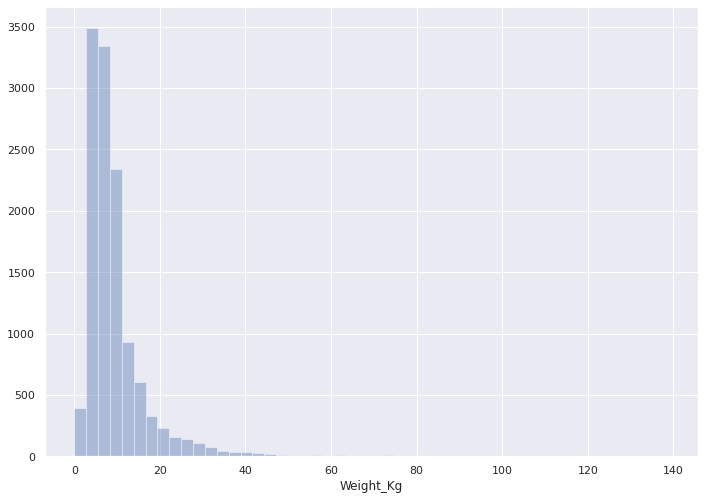

In [555]:
sns.distplot(turtle["Weight_Kg"], kde=False)

In [556]:
turtle.isnull().sum()

Rescue_ID                    0
Date_TimeCaught              0
Researcher                   0
CaptureSite                  0
ForagingGround               0
CaptureMethod                0
Fisher                       0
LandingSite                  0
Species                      0
Tag_1                        0
Tag_2                        0
Lost_Tags                16850
T_Number                 17765
CCL_cm                      23
CCW_cm                      26
Weight_Kg                 5376
Sex                       4321
TurtleCharacteristics       41
Status                    3558
ReleaseSite                 75
Date_TimeRelease          3620
Date_TimeCaughtYear          0
Date_TimeCaughtWeek          0
dtype: int64

In [557]:
turtle.fillna(value={"Weight_Kg": 0, "Sex": "Unknown", "Lost_Tags": "None", "T_Number": "None"}, inplace=True)
turtle.replace({"Sex": {"Not_Recorded": "Unknown"}}, inplace=True)

In [558]:
turtle["Sex"].unique()

array(['Unknown', 'Female', 'Male'], dtype=object)

In [559]:
turtle["Weight_Kg"].head(2)

0    0.0
1    0.0
Name: Weight_Kg, dtype: float64

In [560]:
submissionSample.head(2)

,ID,Capture_Number
0,CaptureSite_0_201901,7
1,CaptureSite_0_201902,1


In [561]:
turtle["Target"] = turtle["CaptureSite"] + "_" + turtle["Date_TimeCaughtYear"] + turtle["Date_TimeCaughtWeek"]
turtle[["Target", "CaptureSite"]].head()

,Target,CaptureSite
0,CaptureSite_0_200051,CaptureSite_0
1,CaptureSite_0_200143,CaptureSite_0
2,CaptureSite_0_200144,CaptureSite_0
3,CaptureSite_0_200210,CaptureSite_0
4,CaptureSite_0_200231,CaptureSite_0


In [575]:
trainTurtle = turtle.groupby(["Target", "CaptureSite", "Date_TimeCaughtYear", "Date_TimeCaughtWeek"]).agg({"Rescue_ID": "count", "Researcher": "nunique", 
                                                             "LandingSite": "nunique", 
                                                             "ForagingGround": "nunique", 
                                                             "CaptureMethod": "nunique", "Fisher": "nunique", 
                                                             "Species": "nunique", "Lost_Tags": "nunique", 
                                                             "CCL_cm": "mean", "CCW_cm": "mean", 
                                                             "Weight_Kg": "mean", "Sex": "nunique", 
                                                             "Status": "nunique", 
                                                             "ReleaseSite": "nunique"}).reset_index()
trainTurtle.shape

(7878, 18)

In [578]:
trainTurtle.rename(columns={"Target": "ID", "Rescue_ID": "Capture_Number"}, inplace=True)

In [602]:
trainTurtle["Date_TimeCaughtWeek"] = trainTurtle["Date_TimeCaughtWeek"].astype(int)

In [579]:
trainTurtle["Date_TimeCaughtYear"] = pd.to_numeric(trainTurtle["Date_TimeCaughtYear"])

In [580]:
trainTurtle.head()

,ID,CaptureSite,Date_TimeCaughtYear,Date_TimeCaughtWeek,Capture_Number,Researcher,LandingSite,ForagingGround,CaptureMethod,Fisher,Species,Lost_Tags,CCL_cm,CCW_cm,Weight_Kg,Sex,Status,ReleaseSite
0,CaptureSite_0_200051,CaptureSite_0,2000,51,1,1,1,1,1,1,1,1,64.70,62.60,0.0,1,1,1
1,CaptureSite_0_200143,CaptureSite_0,2001,43,1,1,1,1,1,1,1,1,35.85,31.35,0.0,1,1,1
2,CaptureSite_0_200144,CaptureSite_0,2001,44,1,1,1,1,1,1,1,1,51.80,49.20,0.0,1,1,1
3,CaptureSite_0_200210,CaptureSite_0,2002,10,1,1,1,1,1,1,1,1,60.50,59.00,0.0,1,1,1
4,CaptureSite_0_200231,CaptureSite_0,2002,31,2,1,1,1,2,1,1,1,33.95,31.85,0.0,1,1,2


In [581]:
trainTurtle.sort_values(by=["Capture_Number"], ascending=False).head()

,ID,CaptureSite,Date_TimeCaughtYear,Date_TimeCaughtWeek,Capture_Number,Researcher,LandingSite,ForagingGround,CaptureMethod,Fisher,Species,Lost_Tags,CCL_cm,CCW_cm,Weight_Kg,Sex,Status,ReleaseSite
5115,CaptureSite_25_200847,CaptureSite_25,2008,47,35,1,1,1,1,7,1,3,48.831429,45.380000,0.000,1,1,1
5119,CaptureSite_25_200851,CaptureSite_25,2008,51,28,1,1,1,1,3,1,2,49.278571,46.089286,0.000,1,0,2
5116,CaptureSite_25_200848,CaptureSite_25,2008,48,22,1,1,1,2,5,1,5,48.827273,45.327273,0.000,1,0,1
5124,CaptureSite_25_200903,CaptureSite_25,2009,03,21,1,1,1,1,2,1,3,50.838095,47.247619,0.000,1,0,2
234,CaptureSite_10_201701,CaptureSite_10,2017,01,20,1,1,1,1,7,2,2,36.155000,34.725000,5.462,1,1,3


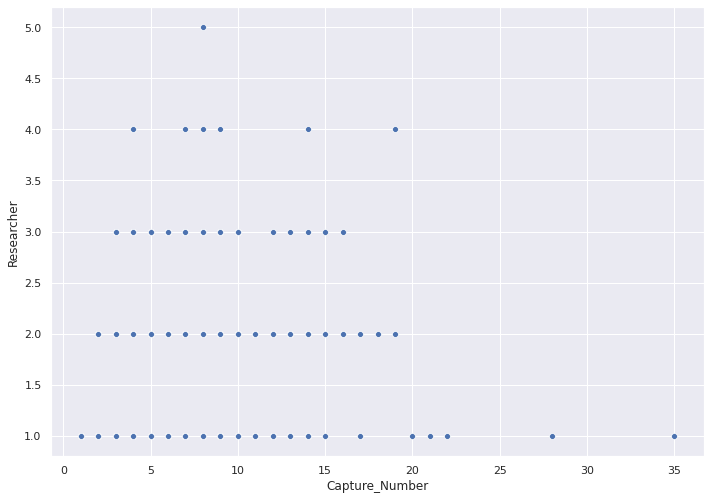

In [582]:
sns.scatterplot(x="Capture_Number", y="Researcher", data=trainTurtle)

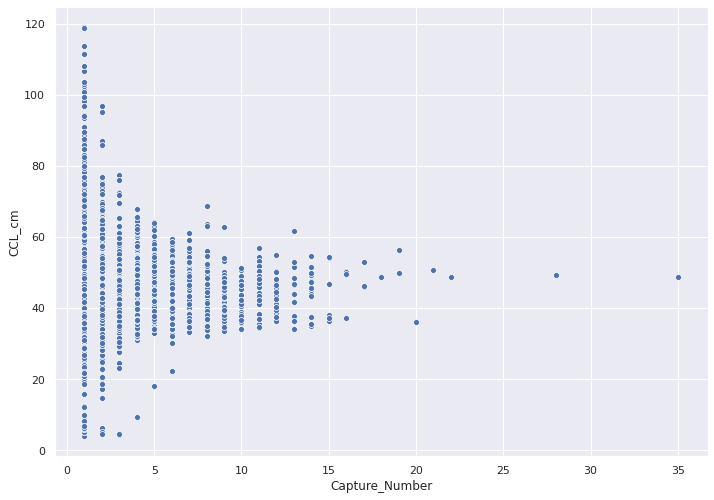

In [583]:
sns.scatterplot(x="Capture_Number", y="CCL_cm", data=trainTurtle)

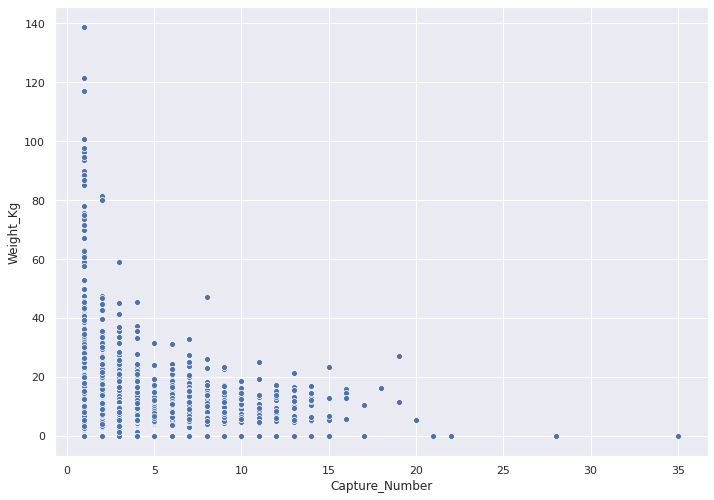

In [584]:
sns.scatterplot(x="Capture_Number", y="Weight_Kg", data=trainTurtle)

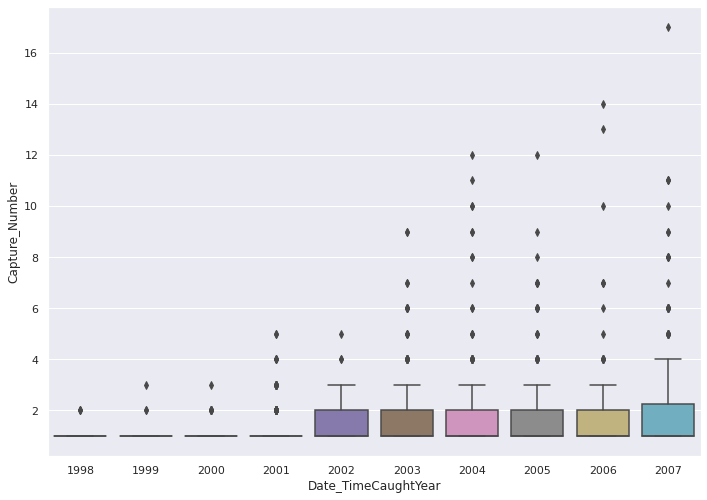

In [585]:
sns.boxplot(x="Date_TimeCaughtYear", y="Capture_Number", 
            data=trainTurtle[(trainTurtle["Date_TimeCaughtYear"] > 1997) & (trainTurtle["Date_TimeCaughtYear"] < 2008)])

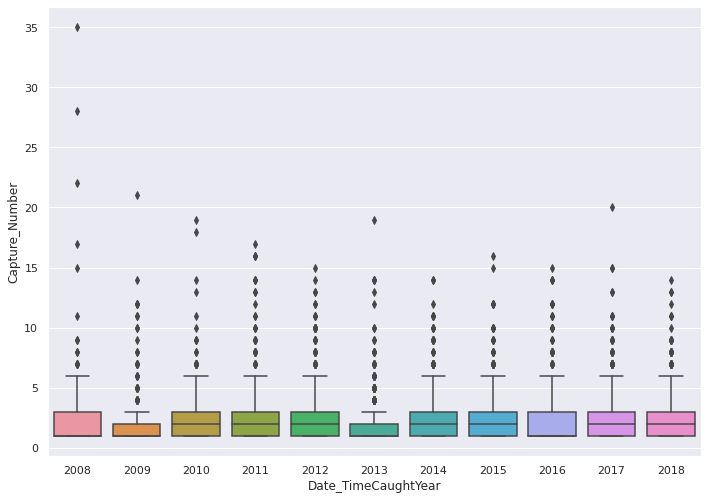

In [586]:
sns.boxplot(x="Date_TimeCaughtYear", y="Capture_Number", 
            data=trainTurtle[(trainTurtle["Date_TimeCaughtYear"] > 2007) & (trainTurtle["Date_TimeCaughtYear"] < 2019)])

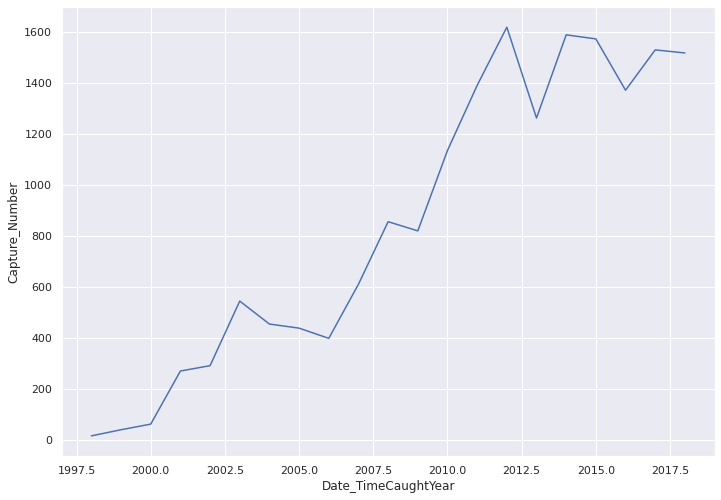

In [589]:
sns.lineplot(x="Date_TimeCaughtYear", y="Capture_Number", 
             data=trainTurtle.groupby(["Date_TimeCaughtYear"])["Capture_Number"].agg("sum").reset_index())

Between 1998 and 2018, there has been a positive trend. This simply means, the number of rescued sea turtles has been increasing across the decades.

In [590]:
trainTurtle.groupby(["Date_TimeCaughtYear"])["Capture_Number"].agg("sum").reset_index()

,Date_TimeCaughtYear,Capture_Number
0,1998,16
1,1999,40
2,2000,62
3,2001,270
4,2002,291
5,2003,544
6,2004,454
7,2005,438
8,2006,398
9,2007,610


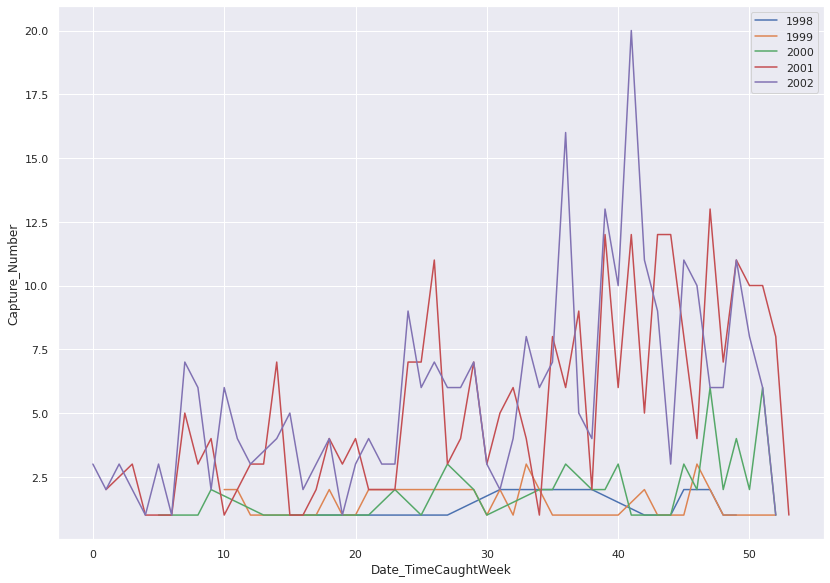

In [643]:
years = sorted(trainTurtle["Date_TimeCaughtYear"].unique().tolist())

for year in years[:5]:
    sns.lineplot(x="Date_TimeCaughtWeek", y="Capture_Number", label=year,
             data=trainTurtle[trainTurtle["Date_TimeCaughtYear"] == year].groupby(["Date_TimeCaughtWeek"])["Capture_Number"].agg("sum").reset_index())

plt.tight_layout()

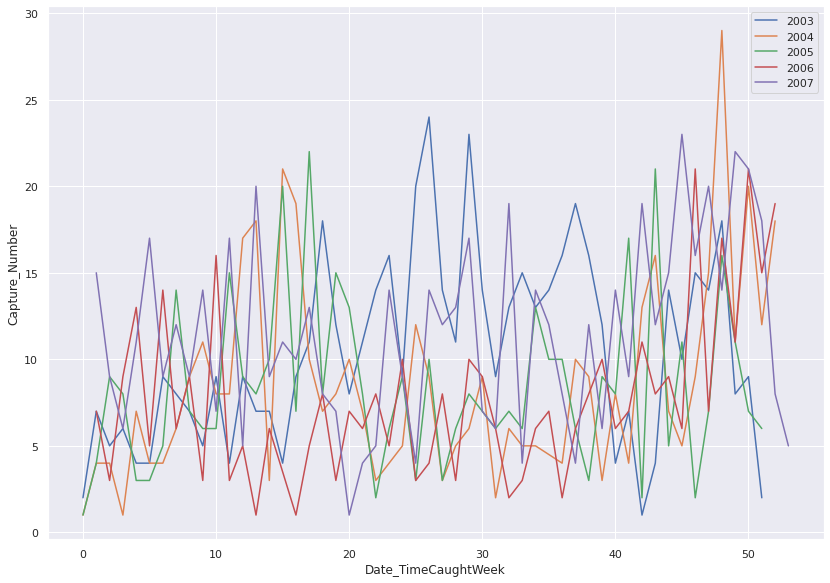

In [644]:
for year in years[5:10]:
    sns.lineplot(x="Date_TimeCaughtWeek", y="Capture_Number", label=year,
             data=trainTurtle[trainTurtle["Date_TimeCaughtYear"] == year].groupby(["Date_TimeCaughtWeek"])["Capture_Number"].agg("sum").reset_index())

plt.tight_layout()

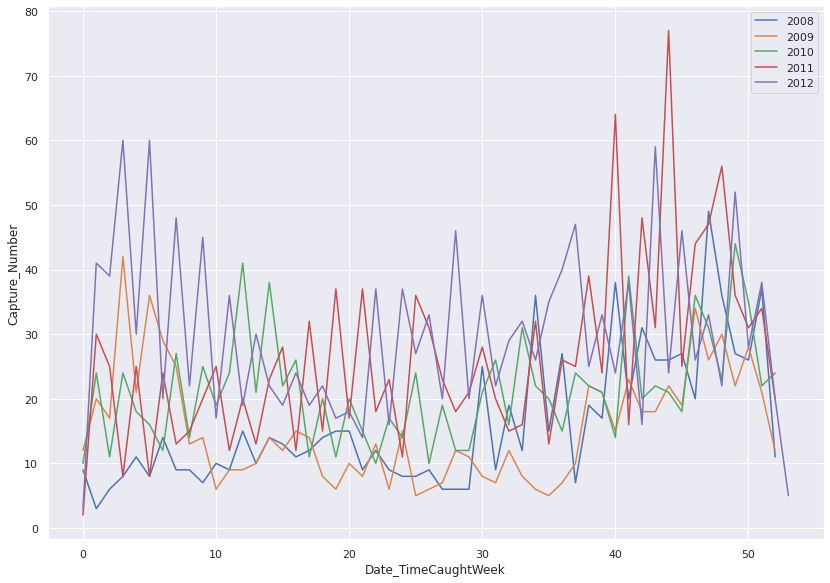

In [645]:
for year in years[10:15]:
    sns.lineplot(x="Date_TimeCaughtWeek", y="Capture_Number", label=year,
             data=trainTurtle[trainTurtle["Date_TimeCaughtYear"] == year].groupby(["Date_TimeCaughtWeek"])["Capture_Number"].agg("sum").reset_index())

plt.tight_layout()

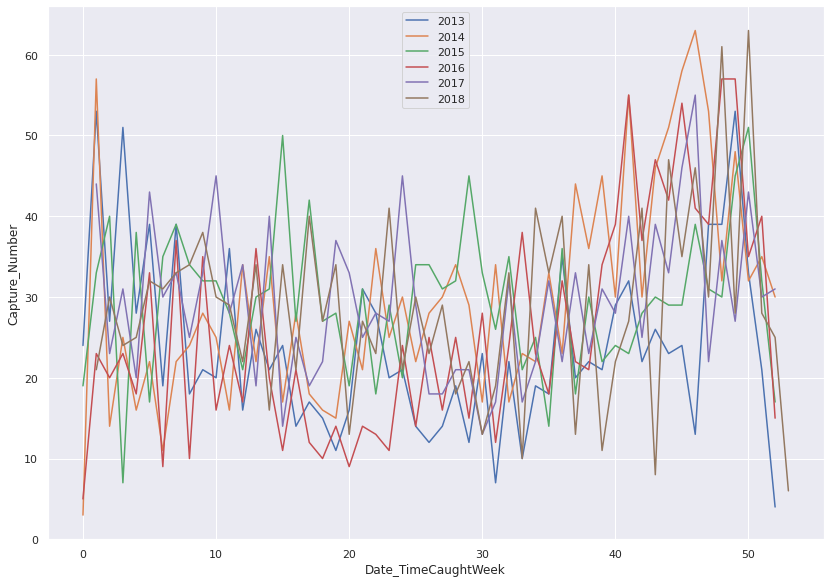

In [646]:
for year in years[15:]:
    sns.lineplot(x="Date_TimeCaughtWeek", y="Capture_Number", label=year,
             data=trainTurtle[trainTurtle["Date_TimeCaughtYear"] == year].groupby(["Date_TimeCaughtWeek"])["Capture_Number"].agg("sum").reset_index())

plt.tight_layout()